# Results


In [8]:
%matplotlib inline
import torch
import numpy as np
import sys
import matplotlib.pyplot as plt
sys.path.insert(0, '..')
from utils.plot import plot_stroke

from utils.constants import Global
from utils.dataset import HandwritingDataset
from utils.data_utils import data_denormalization, data_normalization, valid_offset_normalization
from models.models import HandWritingPredictionNet, HandWritingSynthesisNet
from generate import generate_unconditional_seq, generate_conditional_sequence

In [9]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

data_path = '../data/'
device

device(type='cpu')

### Unconditional generation:

seed: 224
Generating sequence....
torch.Size([121])
torch.Size([121])
torch.Size([121])
torch.Size([121])
torch.Size([121])
torch.Size([121])
torch.Size([121])
torch.Size([121])
torch.Size([121])
torch.Size([121])
torch.Size([121])
torch.Size([121])
torch.Size([121])
torch.Size([121])
torch.Size([121])
torch.Size([121])
torch.Size([121])
torch.Size([121])
torch.Size([121])
torch.Size([121])
torch.Size([121])
torch.Size([121])
torch.Size([121])
torch.Size([121])
torch.Size([121])
torch.Size([121])
torch.Size([121])
torch.Size([121])
torch.Size([121])
torch.Size([121])
torch.Size([121])
torch.Size([121])
torch.Size([121])
torch.Size([121])
torch.Size([121])
torch.Size([121])
torch.Size([121])
torch.Size([121])
torch.Size([121])
torch.Size([121])
torch.Size([121])
torch.Size([121])
torch.Size([121])
torch.Size([121])
torch.Size([121])
torch.Size([121])
torch.Size([121])
torch.Size([121])
torch.Size([121])
torch.Size([121])
torch.Size([121])
torch.Size([121])
torch.Size([121])
torch.Size([

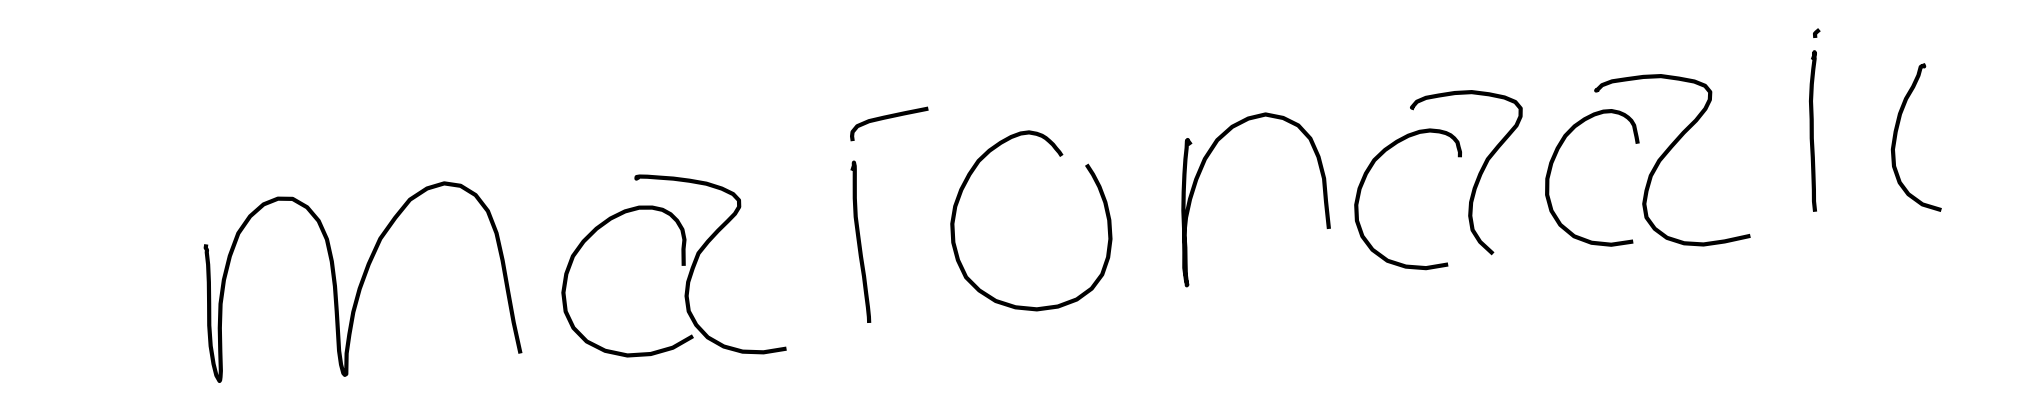

In [10]:
seed = 224
if seed:
    print("seed:",seed)
    torch.manual_seed(seed)
    np.random.seed(seed)
model_path = '../results/best_model_prediction.pt'

train_dataset = HandwritingDataset(data_path, split='train', text_req=False)

seq_len = 400
#prediction
gen_seq = generate_unconditional_seq(model_path, seq_len, device, bias=10., style=None, prime=False)

# denormalize the generated offsets using train set mean and std
gen_seq = data_denormalization(Global.train_mean, Global.train_std, gen_seq)

# plot the sequence
plot_stroke(gen_seq[0])

### Unconditional priming

seed: 224
Prime style index:  1920
begining there. If there is any
torch.Size([1, 547, 3])
Generating sequence....
torch.Size([121])
torch.Size([121])
torch.Size([121])
torch.Size([121])
torch.Size([121])
torch.Size([121])
torch.Size([121])
torch.Size([121])
torch.Size([121])
torch.Size([121])
torch.Size([121])
torch.Size([121])
torch.Size([121])
torch.Size([121])
torch.Size([121])
torch.Size([121])
torch.Size([121])
torch.Size([121])
torch.Size([121])
torch.Size([121])
torch.Size([121])
torch.Size([121])
torch.Size([121])
torch.Size([121])
torch.Size([121])
torch.Size([121])
torch.Size([121])
torch.Size([121])
torch.Size([121])
torch.Size([121])
torch.Size([121])
torch.Size([121])
torch.Size([121])
torch.Size([121])
torch.Size([121])
torch.Size([121])
torch.Size([121])
torch.Size([121])
torch.Size([121])
torch.Size([121])
torch.Size([121])
torch.Size([121])
torch.Size([121])
torch.Size([121])
torch.Size([121])
torch.Size([121])
torch.Size([121])
torch.Size([121])
torch.Size([121])
tor

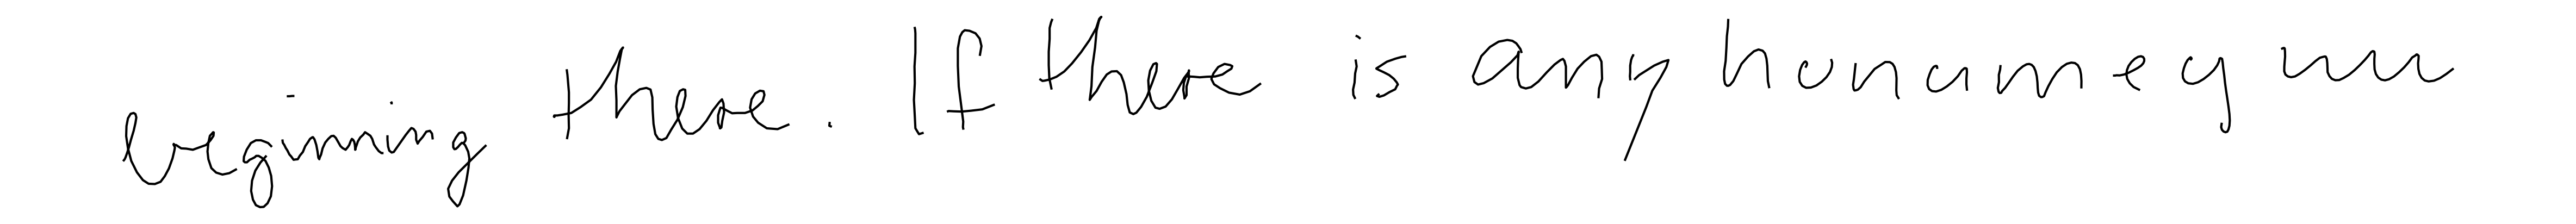

In [11]:
seed = 224
if seed:
    print("seed:",seed)
    torch.manual_seed(seed)
    np.random.seed(seed)
model_path = '../results/best_model_prediction.pt'

train_dataset = HandwritingDataset(data_path, split='train', text_req=False)

seq_len = 400
prime = True
bias = 10.
# file_path = '../app/'
file_path = None
if prime and file_path:
    style = np.load(file_path + 'style.npy', allow_pickle=True, encoding='bytes').astype(np.float32)
    with open(file_path + 'inpText.txt') as file:
        texts = file.read().splitlines()
    real_text = texts[0]
    # plot the sequence
    plot_stroke(style, save_name="style.png")
    print(real_text)
    mean, std, _ = data_normalization(style)
    style = torch.from_numpy(style).unsqueeze(0).to(device)
    print(style.shape)
elif prime:
    strokes = np.load(data_path + 'strokes.npy',
                      allow_pickle=True, encoding='bytes')
    with open(data_path + 'sentences.txt') as file:
        texts = file.read().splitlines()
    idx = np.random.randint(0, len(strokes))
    print("Prime style index: ", idx)
    real_text = texts[idx]
    style = strokes[idx] 
    # plot the sequence
    plot_stroke(style, save_name="style_" + str(idx) + ".png")
    print(real_text)
    mean, std, _ = data_normalization(style)
    style = torch.from_numpy(style).unsqueeze(0).to(device)
    print(style.shape)
    
#prediction
gen_seq = generate_unconditional_seq(model_path, seq_len, device, bias, style, prime)

# denormalize the generated offsets using train set mean and std
gen_seq = data_denormalization(mean, std, gen_seq)

# plot the sequence
plot_stroke(gen_seq[0])

### Conditional generation:

In [12]:
import numpy
import matplotlib

matplotlib.use("AGG")
from matplotlib import pyplot


def plot_stroke(stroke, save_name=None):
    # Plot a single example.
    f, ax = pyplot.subplots()

    x = numpy.cumsum(stroke[:, 1])
    y = numpy.cumsum(stroke[:, 2])

    size_x = x.max() - x.min() + 1 
    size_y = y.max() - y.min() + 1 

    f.set_size_inches(5.0 * size_x / size_y, 5.0)

    cuts = numpy.where(stroke[:, 0] == 1)[0]
    start = 0

    for cut_value in cuts:
        ax.plot(x[start:cut_value], y[start:cut_value], "k-", linewidth=3)
        start = cut_value + 1

    ax.axis("off")  # equal
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)

    if save_name is None:
        pyplot.show()
    else:
        try:
            pyplot.tight_layout()
            pyplot.savefig(save_name, format='svg',pad_inches=0)
        except Exception:
            print("Error building image!: " + save_name)

    pyplot.close()

c:\Users\hladi\Desktop\Handwriting-synthesis3\env\lib\site-packages\ipykernel_launcher.py:4: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://matplotlib_inline.backend_inline' by the following code:
  File "C:\Users\hladi\AppData\Local\Programs\Python\Python37\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\hladi\AppData\Local\Programs\Python\Python37\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "c:\Users\hladi\Desktop\Handwriting-synthesis3\env\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\hladi\Desktop\Handwriting-synthesis3\env\lib\site-packages\traitlets\config\application.py", line 1043, in launch_instance
    app.start()
  File "

In [38]:
seed = 128
if seed:
        print("seed:",seed)
        torch.manual_seed(seed)
        np.random.seed(seed)
model_path = '../results/synthesis/best_model_synthesis_4.pt'

train_dataset = HandwritingDataset(data_path, split='train', text_req=True)
print(train_dataset.char_to_id)
# print(train_dataset.id_to_char)
# print(train_dataset.idx_to_char(np.arange(26,32)))
char_seq = "Pressure, what pressure?"
bias = 2
is_map = False
ytext = char_seq + "     "


gen_seq, phi = generate_conditional_sequence(
        model_path, char_seq, device, train_dataset.char_to_id,
        train_dataset.idx_to_char, bias, prime=False, prime_seq=None, real_text=None, is_map=is_map)
# if is_map:
#     plt.imshow(phi, cmap='viridis', aspect='auto')
#     plt.colorbar()
#     plt.xlabel("time steps")
#     plt.yticks(np.arange(phi.shape[0]), list(ytext), rotation='horizontal')
#     plt.margins(0.2)
#     plt.subplots_adjust(bottom=0.15)
#     plt.show()

gen_seq = data_denormalization(Global.train_mean, Global.train_std, gen_seq)
print("Generated sequence: ", gen_seq.shape)
# plot the sequence
model_path = '../results/synthesis/best_model_synthesis_4.pt'
char_seq = "how are you"

gen_seq2, _ = generate_conditional_sequence(
        model_path, char_seq, device, train_dataset.char_to_id,
        train_dataset.idx_to_char, bias, prime=False, prime_seq=None, real_text=None, is_map=is_map)

gen_seq2 = data_denormalization(Global.train_mean, Global.train_std, gen_seq2)
gen_seq[0]
# np.save("stroke.npy", gen_seq[0])
plot_stroke(gen_seq[0], "test")
plot_stroke(gen_seq2[0], "test2")

import svg_stack as ss

doc = ss.Document()

layout1 = ss.VBoxLayout()
layout1.addSVG('test',alignment=ss.AlignTop|ss.AlignHCenter)
layout1.addSVG('test2',alignment=ss.AlignCenter)
doc.setLayout(layout1)
doc.save('qt_api_test.svg')



seed: 128
{' ': 0, '!': 1, '"': 2, '#': 3, "'": 4, '(': 5, ')': 6, '+': 7, ',': 8, '-': 9, '.': 10, '/': 11, '0': 12, '1': 13, '2': 14, '3': 15, '4': 16, '5': 17, '6': 18, '7': 19, '8': 20, '9': 21, ':': 22, ';': 23, '?': 24, 'A': 25, 'B': 26, 'C': 27, 'D': 28, 'E': 29, 'F': 30, 'G': 31, 'H': 32, 'I': 33, 'J': 34, 'K': 35, 'L': 36, 'M': 37, 'N': 38, 'O': 39, 'P': 40, 'Q': 41, 'R': 42, 'S': 43, 'T': 44, 'U': 45, 'V': 46, 'W': 47, 'X': 48, 'Y': 49, 'Z': 50, 'a': 51, 'b': 52, 'c': 53, 'd': 54, 'e': 55, 'f': 56, 'g': 57, 'h': 58, 'i': 59, 'j': 60, 'k': 61, 'l': 62, 'm': 63, 'n': 64, 'o': 65, 'p': 66, 'q': 67, 'r': 68, 's': 69, 't': 70, 'u': 71, 'v': 72, 'w': 73, 'x': 74, 'y': 75, 'z': 76}
Vocab size:  77
Pressure, what pressure?  
Generating sequence....
batch_size: 1
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
7

### Conditional priming using style from training data:

Prime style index:  400


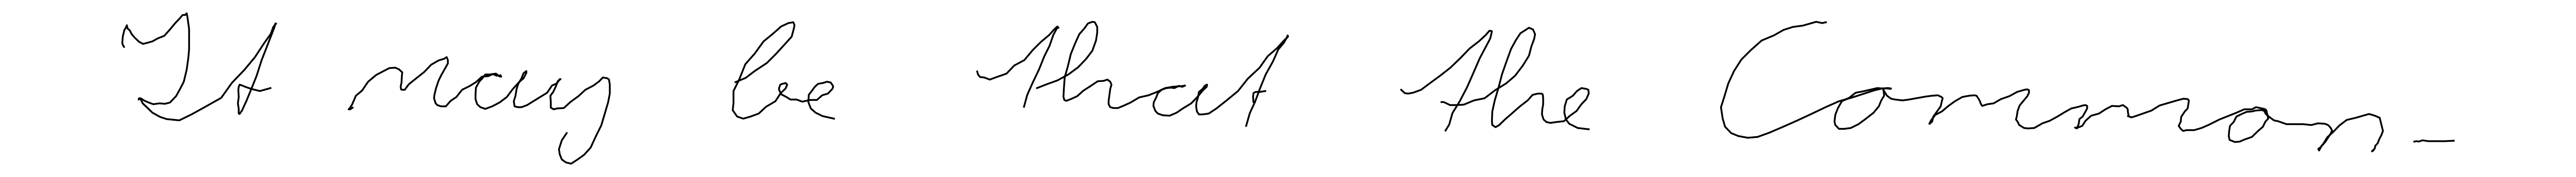

Priming text:  It may be that the Common-
Priming sequence size:  torch.Size([1, 745, 3])
Vocab size:  77
Hello my name is william  
Generating sequence....
batch_size: 1
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234

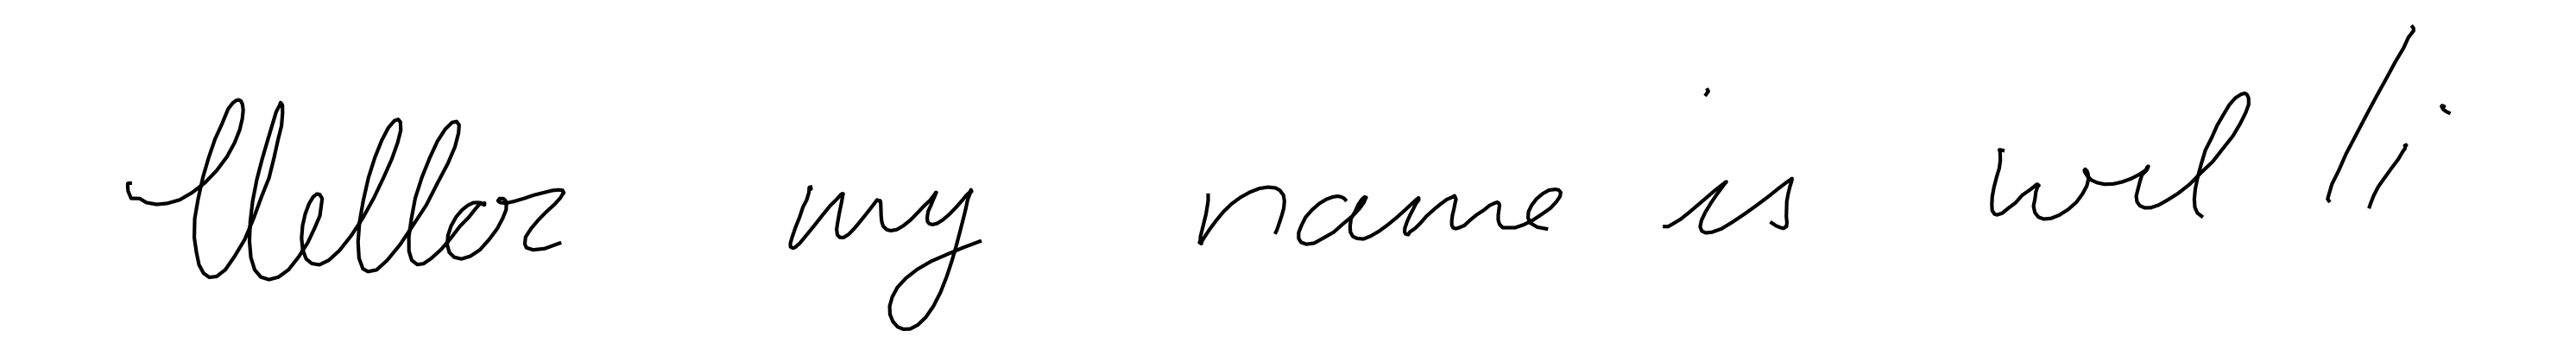

In [36]:
# seed = 218#196 198 200 216 218 220 232 241 262 266 288 290 302
# if seed:
#     print("seed:",seed)
#     torch.manual_seed(seed)
#     np.random.seed(seed)
    
prime = True
bias = 0.2
char_seq = "Hello my name is william"
is_map = False

strokes = np.load(data_path + 'strokes.npy',
                          allow_pickle=True, encoding='bytes')
with open(data_path + 'sentences.txt') as file:
    texts = file.read().splitlines()
    
idx = 400#np.random.randint(0, len(strokes))
print("Prime style index: ", idx)
real_text = texts[idx]
style = strokes[idx] 
# plot the sequence
plot_stroke(style)
print("Priming text: ", real_text)

mean, std, style = data_normalization(style)
style = torch.from_numpy(style).unsqueeze(0).to(device)

# style = valid_offset_normalization(Global.train_mean, Global.train_std, style[None,:,:])
# style = torch.from_numpy(style).to(device)
print("Priming sequence size: ", style.shape)

ytext = real_text + ' ' + char_seq + "  " 

gen_seq, phi = generate_conditional_sequence(
            model_path, char_seq, device, train_dataset.char_to_id,
            train_dataset.idx_to_char, bias, prime, style, real_text, is_map)
if is_map:
    plt.imshow(phi, cmap='viridis', aspect='auto')
    plt.colorbar()
    plt.xlabel("time steps")
    plt.yticks(np.arange(phi.shape[0]), list(ytext), rotation='horizontal')
    plt.margins(0.2)
    plt.subplots_adjust(bottom=0.15)
    plt.show()

# denormalize the generated offsets using train set mean and std
print("data denormalization...")
gen_seq = data_denormalization(Global.train_mean, Global.train_std, gen_seq)
# plot the sequence
plot_stroke(gen_seq[0])

### Conditional priming using unseen style:

In [ ]:
# seed = 122 #213
# torch.manual_seed(seed)
# np.random.seed(seed)
model_path = '../results/synthesis/best_model_synthesis_4.pt'


train_dataset = HandwritingDataset(data_path, split='train', text_req=True)

prime = True
bias = 1.111
char_seq = "   I apologize for the confusion in my previous response." 
is_map = False
file_path = '../app/'

style = np.load( 'stroke.npy', allow_pickle=True, encoding='bytes').astype(np.float32)
real_text = "Hello world"
print(np.min(style, axis=0))
print(np.max(style, axis=0))
# plot the sequence
plot_stroke(style)
print("Priming text: ", real_text)
mean, std, style = data_normalization(style)
style = torch.from_numpy(style).unsqueeze(0).to(device)
# style = valid_offset_normalization(Global.train_mean, Global.train_std, style[None,:,:])
# style = torch.from_numpy(style).to(device)
print("Priming sequence size: ", style.shape)
ytext = real_text + ' ' + char_seq + "  "

gen_seq, phi = generate_conditional_sequence(
            model_path, char_seq, device, train_dataset.char_to_id,
            train_dataset.idx_to_char, bias, prime, style, real_text, is_map)
if is_map:
    plt.imshow(phi, cmap='viridis', aspect='auto')
    plt.colorbar()
    plt.xlabel("time steps")
    plt.yticks(np.arange(phi.shape[0]), list(ytext), rotation='horizontal')
    plt.margins(0.2)
    plt.subplots_adjust(bottom=0.15)
    plt.show()

# denormalize the generated offsets using train set mean and std
print("data denormalization...")
end = style.shape[1]
test = data_denormalization(Global.train_mean, Global.train_std, gen_seq[:,:])
gen_seq[:,:end] = data_denormalization(mean, std, gen_seq[:, :end])
gen_seq[:,end:] = data_denormalization(Global.train_mean, Global.train_std, gen_seq[:,end:])
# plot the sequence
print(gen_seq.shape)
plot_stroke(gen_seq[0][:end])
plot_stroke(gen_seq[0,end:])
plot_stroke(test[0])

In [ ]:
import pickle
import random
import numpy as np
import svgwrite
from IPython.display import SVG, display


def get_bounds(data, factor):
    min_x = 0
    max_x = 0
    min_y = 0
    max_y = 0

    abs_x = 0
    abs_y = 0
    for i in range(len(data)):
        x = float(data[i, 1]) / factor
        y = float(data[i, 2]) / factor
        abs_x += x
        abs_y += y
        min_x = min(min_x, abs_x)
        min_y = min(min_y, abs_y)
        max_x = max(max_x, abs_x)
        max_y = max(max_y, abs_y)

    return (min_x, max_x, min_y, max_y)

# old version, where each path is entire stroke (smaller svg size, but
# have to keep same color)


def draw_strokes(data, factor=1, svg_filename='sample.svg'):
    min_x, max_x, min_y, max_y = get_bounds(data, factor)
    dims = (50 + max_x - min_x, 50 + max_y - min_y)

    dwg = svgwrite.Drawing(svg_filename, size=dims)
    dwg.add(dwg.rect(insert=(0, 0), size=dims, fill='white'))

    lift_pen = 1

    abs_x = 25 - min_x
    abs_y = 25 - min_y
    p = "M%s,%s " % (abs_x, abs_y)

    command = "m"

    for i in range(len(data)):
        if (lift_pen == 1):
            command = "m"
        elif (command != "l"):
            command = "l"
        else:
            command = ""
        x = float(data[i, 1]) / factor
        y = float(-data[i, 2]) / factor
        lift_pen = data[i, 0]
        p += command + str(x) + "," + str(y) + " "

    the_color = "blue"
    stroke_width = 1

    dwg.add(dwg.path(p).stroke(the_color, stroke_width).fill("none"))

    dwg.save()
    display(SVG(dwg.tostring()))